In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("fiat500.csv")

In [4]:
df.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [5]:
df.isna().sum().sum()

0

In [6]:
print(df.to_string())

        ID   model  engine_power  age_in_days      km  previous_owners        lat        lon  price
0        1  lounge            51          882   25000                1  44.907242   8.611560   8900
1        2     pop            51         1186   32500                1  45.666359  12.241890   8800
2        3   sport            74         4658  142228                1  45.503300  11.417840   4200
3        4  lounge            51         2739  160000                1  40.633171  17.634609   6000
4        5     pop            73         3074  106880                1  41.903221  12.495650   5700
5        6     pop            74         3623   70225                1  45.000702   7.682270   7900
6        7  lounge            51          731   11600                1  44.907242   8.611560  10750
7        8  lounge            51         1521   49076                1  41.903221  12.495650   9190
8        9   sport            73         4049   76000                1  45.548000  11.549470   5600


In [7]:
df.corr()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
ID,1.000000,-0.034059,-0.060753,-0.006537,0.007803,-0.058207,0.058941,0.028516
engine_power,-0.034059,1.000000,0.319190,0.285495,-0.005030,0.005721,-0.005032,-0.277235
age_in_days,-0.060753,0.319190,1.000000,0.833890,0.075775,0.062982,-0.042667,-0.893328
km,-0.006537,0.285495,0.833890,1.000000,0.097539,0.035519,0.004839,-0.859373
previous_owners,0.007803,-0.005030,0.075775,0.097539,1.000000,0.001697,-0.026836,-0.076274
lat,-0.058207,0.005721,0.062982,0.035519,0.001697,1.000000,-0.766646,-0.011733
lon,0.058941,-0.005032,-0.042667,0.004839,-0.026836,-0.766646,1.000000,-0.003541
price,0.028516,-0.277235,-0.893328,-0.859373,-0.076274,-0.011733,-0.003541,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [9]:
df.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [10]:
print(df.shape)

(1538, 9)


In [11]:
og_df=df.drop(columns=['ID','lat','lon','model'])

In [12]:
og_df.corr()

,engine_power,age_in_days,km,previous_owners,price
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328
km,0.285495,0.833890,1.000000,0.097539,-0.859373
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000


In [13]:
df['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [14]:
df['model'].value_counts()

lounge    1094
pop        358
sport       86
Name: model, dtype: int64

In [15]:
dfsport=df.loc[df['model']=='sport']
dflounge=df.loc[df['model']=='lounge']
dfpop=df.loc[df['model']=='pop']

In [16]:
print(dfsport.to_string())


        ID  model  engine_power  age_in_days      km  previous_owners        lat        lon  price
2        3  sport            74         4658  142228                1  45.503300  11.417840   4200
8        9  sport            73         4049   76000                1  45.548000  11.549470   5600
9       10  sport            51         3653   89000                1  45.438301  10.991700   6000
27      28  sport            51         3531  100000                1  40.976452  14.172280   4950
33      34  sport            51         3927  140000                2  40.755932  14.690190   5200
38      39  sport            51          790   43100                1  45.334080  11.376870   9950
40      41  sport            51         4139  119000                1  45.349319   7.742600   4890
48      49  sport            51         3684  160000                1  45.405472  10.278290   4900
49      50  sport            51         4596  107000                1  40.845901  14.369270   4300
51      52

In [17]:
dfsport.corr()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
ID,1.000000,0.027996,-0.083028,-0.058993,0.125542,0.072401,-0.122591,0.061604
engine_power,0.027996,1.000000,0.329852,0.259489,-0.137241,0.055596,-0.080257,-0.313712
age_in_days,-0.083028,0.329852,1.000000,0.646560,0.064604,-0.049660,0.043742,-0.888997
km,-0.058993,0.259489,0.646560,1.000000,0.140943,0.037080,-0.043544,-0.735207
previous_owners,0.125542,-0.137241,0.064604,0.140943,1.000000,0.006189,-0.000851,-0.117777
lat,0.072401,0.055596,-0.049660,0.037080,0.006189,1.000000,-0.777650,0.014364
lon,-0.122591,-0.080257,0.043742,-0.043544,-0.000851,-0.777650,1.000000,-0.015059
price,0.061604,-0.313712,-0.888997,-0.735207,-0.117777,0.014364,-0.015059,1.000000


In [18]:
dfsport_no_id=dfsport.drop(columns=['ID','lat','lon'])

In [19]:
dfsport_no_id.describe()

,engine_power,age_in_days,km,previous_owners,price
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,55.465116,3310.372093,103382.802326,1.267442,6275.406977
std,8.210034,1165.134994,43041.072473,0.602435,1916.322860
min,51.000000,517.000000,6200.000000,1.000000,3800.000000
25%,51.000000,3020.750000,72425.000000,1.000000,4892.500000
50%,51.000000,3684.000000,102400.000000,1.000000,5800.000000
75%,56.250000,4139.000000,129973.000000,1.000000,6900.000000
max,74.000000,4658.000000,190000.000000,4.000000,10800.000000


In [20]:
dflounge_no_id=dflounge.drop(columns=['ID','lat','lon'])
dflounge_no_id.describe()

,engine_power,age_in_days,km,previous_owners,price
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,51.565814,1437.570384,46873.445155,1.117002,8949.486289
std,3.181137,1203.670113,37051.887997,0.406966,1798.159691
min,51.000000,366.000000,1232.000000,1.000000,2900.000000
25%,51.000000,640.000000,18826.500000,1.000000,7800.000000
50%,51.000000,790.000000,33105.500000,1.000000,9500.000000
75%,51.000000,2192.000000,67000.000000,1.000000,10400.000000
max,77.000000,4658.000000,235000.000000,4.000000,11100.000000


In [21]:
dfpop_no_id=dfpop.drop(columns=['ID','lat','lon'])
dfpop_no_id.describe()

,engine_power,age_in_days,km,previous_owners,price
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,52.083799,1904.508380,61320.100559,1.108939,7987.349162
std,4.243131,1238.086949,38277.729326,0.384400,1838.241284
min,51.000000,366.000000,3000.000000,1.000000,2500.000000
25%,51.000000,790.000000,30000.000000,1.000000,6900.000000
50%,51.000000,1751.000000,54099.000000,1.000000,7999.500000
75%,51.000000,2769.000000,85875.000000,1.000000,9500.000000
max,77.000000,4658.000000,201000.000000,4.000000,11090.000000


In [22]:
print(dflounge.to_string())

        ID   model  engine_power  age_in_days      km  previous_owners        lat        lon  price
0        1  lounge            51          882   25000                1  44.907242   8.611560   8900
3        4  lounge            51         2739  160000                1  40.633171  17.634609   6000
6        7  lounge            51          731   11600                1  44.907242   8.611560  10750
7        8  lounge            51         1521   49076                1  41.903221  12.495650   9190
11      12  lounge            51          366   17500                1  45.069679   7.704920  10990
12      13  lounge            51          456   18450                1  45.426571  11.788130   9700
14      15  lounge            51         1035   40500                1  40.911362  14.211200   9300
15      16  lounge            51         1096   28200                1  45.697208   9.845970   9500
16      17  lounge            73         4200  110000                1  41.082352  14.254250   5250


In [23]:
print(dfpop.to_string())

        ID model  engine_power  age_in_days      km  previous_owners        lat        lon  price
1        2   pop            51         1186   32500                1  45.666359  12.241890   8800
4        5   pop            73         3074  106880                1  41.903221  12.495650   5700
5        6   pop            74         3623   70225                1  45.000702   7.682270   7900
10      11   pop            51          790   43286                1  40.871429  14.438960   8950
13      14   pop            51         3835  120000                1  40.531590  17.436159   4800
17      18   pop            51         2223   96848                1  43.782372  11.254990   7990
26      27   pop            51         3592  124000                1  40.966179  17.116480   6800
35      36   pop            51         3653  138116                2  40.633171  17.634609   5000
36      37   pop            51          852   17000                1  45.505161   8.939100   8990
37      38   pop    

In [24]:
print(dfsport.head())

    ID  model  engine_power  age_in_days      km  previous_owners        lat  \
2    3  sport            74         4658  142228                1  45.503300   
8    9  sport            73         4049   76000                1  45.548000   
9   10  sport            51         3653   89000                1  45.438301   
27  28  sport            51         3531  100000                1  40.976452   
33  34  sport            51         3927  140000                2  40.755932   

         lon  price  
2   11.41784   4200  
8   11.54947   5600  
9   10.99170   6000  
27  14.17228   4950  
33  14.69019   5200  


In [25]:
x=dfsport_no_id.drop(columns=['model','engine_power','price'])
y=dfsport_no_id['price']

In [26]:
print(x)
print(y)

      age_in_days      km  previous_owners
2            4658  142228                1
8            4049   76000                1
9            3653   89000                1
27           3531  100000                1
33           3927  140000                2
...           ...     ...              ...
1498         1400   60000                1
1501         3774  161900                1
1504         4322   95000                1
1531         4505  127000                1
1533         3712  115280                1

[86 rows x 3 columns]
2        4200
8        5600
9        6000
27       4950
33       5200
        ...  
1498    10800
1501     4500
1504     4500
1531     4750
1533     5200
Name: price, Length: 86, dtype: int64


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [29]:
ans=model.predict([[2190,70000,1],[3456,80000,9],[10,900,1]])
print(ans)

[ 8017.82458566  5556.41928202 11402.17748405]


In [30]:
x_sport=dfsport_no_id.drop(columns=['model','engine_power','price'])
y_sport=dfsport_no_id['price']
model_sport=LinearRegression()
model_sport.fit(x_sport,y_sport)

x_lounge=dflounge_no_id.drop(columns=['model','engine_power','price'])
y_lounge=dflounge_no_id['price']
model_lounge=LinearRegression()
model_lounge.fit(x_lounge,y_lounge)

x_pop=dfpop_no_id.drop(columns=['model','engine_power','price'])
y_pop=dfpop_no_id['price']
model_pop=LinearRegression()
model_pop.fit(x_pop,y_pop)

LinearRegression()

In [31]:
car_model=input("Enter car model : ")
if(car_model=='sport' or car_model=='lounge' or car_model=='pop'):
    age_in_days=int(input("enter the age of the car in days :"))
    km=int(input('enter kilometeres driven :'))
    no_of_owners=int(input('enter no of owners :'))
    list_of_features=[age_in_days,km,no_of_owners]
    if car_model=='sport':
        ans=model_sport.predict([list_of_features])    
        print('price is: ',int(ans))
    elif car_model=='lounge':
        ans=model_lounge.predict([list_of_features])
        print('price is :',int(ans))
    elif car_model=='pop':
        ans=model_pop.predict([list_of_features])
        print('price is :',int(ans))
else :
    print("enter appropriate model name")
    

Enter car model : sport
enter the age of the car in days :12
enter kilometeres driven :1213312
enter no of owners :123
price is:  -16254


In [32]:
df_total=df.drop(columns=['ID','lat','lon','engine_power','price'])
print(df_total)

       model  age_in_days      km  previous_owners
0     lounge          882   25000                1
1        pop         1186   32500                1
2      sport         4658  142228                1
3     lounge         2739  160000                1
4        pop         3074  106880                1
...      ...          ...     ...              ...
1533   sport         3712  115280                1
1534  lounge         3835  112000                1
1535     pop         2223   60457                1
1536  lounge         2557   80750                1
1537     pop         1766   54276                1

[1538 rows x 4 columns]


In [33]:
df_total=pd.get_dummies(df_total,dtype=int)

In [34]:
print(df_total.to_string())

      age_in_days      km  previous_owners  model_lounge  model_pop  model_sport
0             882   25000                1             1          0            0
1            1186   32500                1             0          1            0
2            4658  142228                1             0          0            1
3            2739  160000                1             1          0            0
4            3074  106880                1             0          1            0
5            3623   70225                1             0          1            0
6             731   11600                1             1          0            0
7            1521   49076                1             1          0            0
8            4049   76000                1             0          0            1
9            3653   89000                1             0          0            1
10            790   43286                1             0          1            0
11            366   17500   

In [35]:
x_total=df_total
y_total=df['price']
model_total=LinearRegression()
model_total.fit(x_total,y_total)


model_type=input("enter car model : ")
model_types=['sport','pop','lounge']
if(model_type in model_types):
    age_in_day=int(input('enter age of car in days : '))
    kilometer=int(input('enter no of kilometers driven : '))
    previous_owners_no=int(input('enter no of previous owners : '))
    if model_type =='lounge':
        model_lounge=1
        model_sport=0
        model_pop=0
    elif model_type =='sport':
        model_lounge=0
        model_sport=1
        model_pop=0
    else:
        model_lounge=0
        model_sport=0
        model_pop=1
    features=[age_in_day,kilometer,previous_owners_no,model_lounge,model_pop,model_sport]
    price=model_total.predict([features])
    print("price of the car is : Rs.",int(price))
else:
    print("enter correct model name")



enter car model : 1234
enter correct model name


In [36]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_total,y_total,test_size=0.33,random_state=2)


In [80]:
print(x_train.shape)
print(x_test.shape)

(1030, 6)
(508, 6)


In [81]:
final_model=LinearRegression()
final_model.fit(x_train,y_train)

LinearRegression()

In [82]:
model_type=input("enter car model : ")
model_types=['sport','pop','lounge']
if(model_type in model_types):
    age_in_day=int(input('enter age of car in days : '))
    kilometer=int(input('enter no of kilometers driven : '))
    previous_owners_no=int(input('enter no of previous owners : '))
    if model_type =='lounge':
        model_lounge=1
        model_sport=0
        model_pop=0
    elif model_type =='sport':
        model_lounge=0
        model_sport=1
        model_pop=0
    else:
        model_lounge=0
        model_sport=0
        model_pop=1
    features=[age_in_day,kilometer,previous_owners_no,model_lounge,model_pop,model_sport]
    price=final_model.predict([features])
    print("price of the car is : Rs.",int(price))
else:
    print("enter correct model name")



enter car model : 
enter correct model name


In [83]:
import seaborn as sns
import matplotlib as plt

In [84]:
print(x_test)

      age_in_days      km  previous_owners  model_lounge  model_pop  \
744          1858   33000                1             0          1   
519          1858   33000                1             0          1   
1413         2374   75900                1             1          0   
143          1827   46000                1             0          1   
814          2009   73000                1             0          1   
...           ...     ...              ...           ...        ...   
1476          731   16500                1             1          0   
662          1492   23016                1             1          0   
508           790   42000                1             1          0   
624          4414  109381                1             1          0   
691           456   12872                1             1          0   

      model_sport  
744             0  
519             0  
1413            0  
143             0  
814             0  
...           ...  
1476   

In [85]:
final_ans=final_model.predict(x_test)

<AxesSubplot:xlabel='Km', ylabel='Price'>

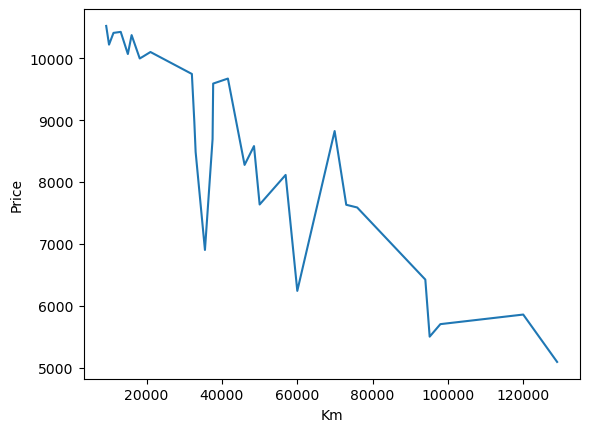

In [86]:
result=pd.DataFrame(columns=['Km','Price'])
result['Km']=x_test['km']
result['Price']=final_ans
sns.lineplot(x='Km',y='Price',data=result.head(30))

In [87]:
print(result)

          Km         Price
744    33000   8485.304988
519    33000   8485.304988
1413   75900   7590.948210
143    46000   8277.609985
814    73000   7634.295790
...      ...           ...
1476   16500  10075.162313
662    23016   9303.057099
508    42000   9564.698303
624   109381   5232.486515
691    12872  10377.130872

[508 rows x 2 columns]


In [91]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_total,y_total,test_size=0.20,random_state=2)

In [92]:
final_ans2=final_model.predict(x_test2)

<AxesSubplot:xlabel='Km', ylabel='Price'>

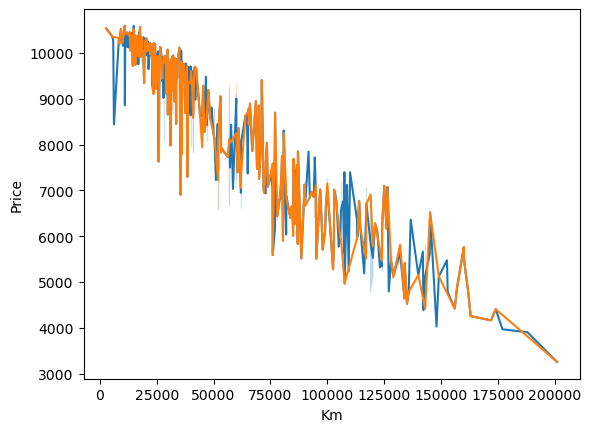

In [94]:
result1=pd.DataFrame(columns=['Km','Price'])
result2=pd.DataFrame(columns=['Km','Price'])
result1['Km']=x_test['km']
result2['Km']=x_test2['km']
result1['Price']=final_ans
result2['Price']=final_ans2
sns.lineplot(x='Km',y='Price',data=result)
sns.lineplot(x='Km',y='Price',data=result2)